In [87]:
# ---------------------------------------------------------
# If you are running in a Jupyter or Colab environment,
# install 'fredapi' first by uncommenting the following line:
# !pip install fredapi
# ---------------------------------------------------------

!pip install fredapi

import pandas as pd
import numpy as np
from fredapi import Fred
import os

pd.options.display.max_columns = None

In [89]:
# 1. Your FRED API key
fred_api_key = "a051f637ff06f722b6837a28d9a45e85"
fred = Fred(api_key=fred_api_key)

In [91]:
# 2. Dictionary of ~100 FRED series (some may not be strictly "daily" or fully active)
fred_series_ids = {
    # 1–11: Treasury Constant Maturity Rates (Daily)
    "DGS1MO": "1-Month Treasury Constant Maturity Rate",
    "DGS3MO": "3-Month Treasury Constant Maturity Rate",
    "DGS6MO": "6-Month Treasury Constant Maturity Rate",
    "DGS1": "1-Year Treasury Constant Maturity Rate",
    "DGS2": "2-Year Treasury Constant Maturity Rate",
    "DGS3": "3-Year Treasury Constant Maturity Rate",
    "DGS5": "5-Year Treasury Constant Maturity Rate",
    "DGS7": "7-Year Treasury Constant Maturity Rate",
    "DGS10": "10-Year Treasury Constant Maturity Rate",
    "DGS20": "20-Year Treasury Constant Maturity Rate",
    "DGS30": "30-Year Treasury Constant Maturity Rate",

    # 12–14: T-Bill Secondary Market Rates (Daily)
    "DTB4WK": "4-Week Treasury Bill: Secondary Market Rate",
    "DTB3": "3-Month Treasury Bill: Secondary Market Rate",
    "DTB6": "6-Month Treasury Bill: Secondary Market Rate",

    # 15–19: Corporate Bond Spreads (Daily)
    "BAMLH0A0HYM2": "ICE BofA US High Yield Master II OAS",
    "BAMLCC0A1AA": "ICE BofA AAA US Corporate Index OAS",
    "BAMLCC0A3A": "ICE BofA Single-A US Corporate Index OAS",
    "BAMLCC0A4BBB": "ICE BofA BBB US Corporate Index OAS",
    "BAMLCC0A5BB": "ICE BofA BB US Corporate Index OAS",

    # 20–26: Federal Funds, Bank, and Repo Rates (Daily)
    "EFFR": "Effective Federal Funds Rate",
    "IORR": "Interest Rate on Reserve Balances (IORR)",
    "IOER": "Interest Rate on Excess Reserves (Discontinued)",
    "OBFR": "Overnight Bank Funding Rate",
    "SOFR": "Secured Overnight Financing Rate",
    "TEDRATE": "TED Spread",
    "RRPONTSYD": "Overnight Reverse Repurchase Agreements Award Rate",

    # 27–31: LIBOR (Daily)
    "USD1MTD156N": "1-Month LIBOR (USD)",
    "USD3MTD156N": "3-Month LIBOR (USD)",
    "USD6MTD156N": "6-Month LIBOR (USD)",
    "GBP1MTD156N": "1-Month LIBOR (GBP)",
    "GBP3MTD156N": "3-Month LIBOR (GBP)",

    # 32–45: Exchange Rates (Daily, “DEX” prefix from FRED)
    "DEXUSEU": "U.S. Dollar to Euro Exchange Rate",
    "DEXJPUS": "U.S. Dollar to Japanese Yen Exchange Rate",
    "DEXUSUK": "U.S. Dollar to U.K. Pound Sterling Exchange Rate",
    "DEXCAUS": "Canadian Dollar to U.S. Dollar Exchange Rate",
    "DEXCHUS": "Chinese Yuan to U.S. Dollar Exchange Rate",
    "DEXMXUS": "Mexican Peso to U.S. Dollar Exchange Rate",
    "DEXKOUS": "South Korean Won to U.S. Dollar Exchange Rate",
    "DEXBZUS": "Brazilian Real to U.S. Dollar Exchange Rate",
    "DEXARUS": "Argentine Peso to U.S. Dollar Exchange Rate",
    "DEXINUS": "Indian Rupee to U.S. Dollar Exchange Rate",
    "DEXSZUS": "Swiss Franc to U.S. Dollar Exchange Rate",
    "DEXSIUS": "Singapore Dollar to U.S. Dollar Exchange Rate",
    "DEXHKUS": "Hong Kong Dollar to U.S. Dollar Exchange Rate",
    "DEXTAUS": "New Taiwan Dollar to U.S. Dollar Exchange Rate",

    # 46–49: Additional Exchange Rates
    "DEXTHUS": "Thai Baht to U.S. Dollar Exchange Rate",
    "DEXSDUS": "Swedish Krona to U.S. Dollar Exchange Rate",
    "DEXSLUS": "Sri Lankan Rupee to U.S. Dollar Exchange Rate",
    "DEXNOUS": "Norwegian Krone to U.S. Dollar Exchange Rate",

    # 50–54: Key Commodities (Daily)
    "DCOILWTICO": "Crude Oil Prices: WTI",
    "DCOILBRENTEU": "Crude Oil Prices: Brent - Europe",
    "GOLDAMGBD228NLBM": "Gold Fixing Price 10:30 A.M. (London)",
    "SLVPRUSD": "Silver Price (check if truly daily)",
    "DHHNGSP": "Henry Hub Natural Gas Spot Price",

    # 55: Jet Fuel (Daily)
    "DJFUELUSGULF": "U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price",

    # 56–60: Equity Indexes (Daily)
    "SP500": "S&P 500 Index",
    "VIXCLS": "CBOE Volatility Index (VIX)",
    "NASDAQCOM": "NASDAQ Composite Index",
    "DJIA": "Dow Jones Industrial Average",
    "WILL5000IND": "Wilshire 5000 Total Market Index",

    # 61–65: ICE BofA Corporate Yields (Daily)
    "BAMLC0A1CAAAEY": "ICE BofA AAA US Corp Index Effective Yield",
    "BAMLC0A2CAAEY": "ICE BofA AA US Corp Index Effective Yield",
    "BAMLC0A3CAEY": "ICE BofA Single-A US Corp Index Effective Yield",
    "BAMLC0A4CBBBEY": "ICE BofA BBB US Corp Index Effective Yield",
    "BAMLH0A0HYBBEY": "ICE BofA US High Yield Master II Effective Yield",

    # 66: Bank Prime Loan Rate (Daily updates only when changed)
    "DPRIME": "Bank Prime Loan Rate",

    # 67–71: More LIBOR variants (Daily)
    "GBP6MTD156N": "6-Month LIBOR (GBP)",
    "CHF3MTD156N": "3-Month LIBOR (CHF)",
    "JPN3MTD156N": "3-Month LIBOR (JPY)",
    "EUR3MTD156N": "3-Month LIBOR (EUR)",
    "USDONTD156N": "Overnight LIBOR (USD)",

    # 72–76: Additional “DEX” exchange rates
    "DEXDNUS": "Danish Krone to U.S. Dollar Exchange Rate",
    "DEXALUS": "Albanian Lek to U.S. Dollar Exchange Rate",
    "DEXCZHUS": "Czech Koruna to U.S. Dollar Exchange Rate",
    "DEXMAUS": "Moroccan Dirham to U.S. Dollar Exchange Rate",
    "DEXPLUS": "Polish Zloty to U.S. Dollar Exchange Rate",

    # 77–79: More daily rates/spreads
    "BAMLH0A1CAAEY": "ICE BofA CCC & Lower US High Yield Index Effective Yield",
    "T10YIE": "10-Year Breakeven Inflation Rate",
    "T5YIE": "5-Year Breakeven Inflation Rate",

    # 80–82: Treasury Inflation-Indexed Security (TIPS) Yields (Daily)
    "DFII5": "5-Year TIPS Yield",
    "DFII10": "10-Year TIPS Yield",
    "DFII30": "30-Year TIPS Yield",

    # 83–92: ICE Swap Rates (Daily, if available)
    "ICERATES1100USD1Y": "1-Year ICE Swap Rate (USD)",
    "ICERATES1100USD2Y": "2-Year ICE Swap Rate (USD)",
    "ICERATES1100USD3Y": "3-Year ICE Swap Rate (USD)",
    "ICERATES1100USD5Y": "5-Year ICE Swap Rate (USD)",
    "ICERATES1100USD7Y": "7-Year ICE Swap Rate (USD)",
    "ICERATES1100USD10Y": "10-Year ICE Swap Rate (USD)",
    "ICERATES1100USD30Y": "30-Year ICE Swap Rate (USD)",
    "BAMLH0A3HYCEY": "ICE BofA Single-B US High Yield Index Effective Yield",
    "T20YIEM": "20-Year Breakeven Inflation Rate (check freq)",
    "DHOILNYH": "No. 2 Heating Oil, New York Harbor (check daily)",

    # 93–100: Fillers (some not daily!)
    "DGASSP": "Gasoline Spot Price (US Average, check freq)",
    "MICH": "U of Michigan: Consumer Sentiment (likely monthly)",
    "ICSA": "Initial Jobless Claims (weekly)",
    "WALCL": "Fed Assets (weekly)",
    "CPIAUCSL": "CPI for All Urban Consumers (monthly)",
    "GS10": "10-Year Treasury (alias for DGS10?)",
    "T7YIE": "7-Year Breakeven Inflation Rate (check freq)",
    "PNAPETHUSDM": "Palladium Price (check freq)"
}

In [93]:
# 2. Dictionary of ~100 FRED series (some may not be strictly "daily" or fully active)
fred_series = {
    # 1–11: Treasury Constant Maturity Rates (Daily)
    "DGS1MO": "1-Month Treasury Constant Maturity Rate",
    "DGS6MO": "6-Month Treasury Constant Maturity Rate",
    "DGS1": "1-Year Treasury Constant Maturity Rate",
    "DGS5": "5-Year Treasury Constant Maturity Rate",
    "DGS10": "10-Year Treasury Constant Maturity Rate",
    "DGS30": "30-Year Treasury Constant Maturity Rate",

    # 12–14: T-Bill Secondary Market Rates (Daily)
    "DTB4WK": "4-Week Treasury Bill: Secondary Market Rate",
    "DTB3": "3-Month Treasury Bill: Secondary Market Rate",
    "DTB6": "6-Month Treasury Bill: Secondary Market Rate",

    # 15–19: Corporate Bond Spreads (Daily)
    "BAMLCC0A1AA": "ICE BofA AAA US Corporate Index OAS",

    # 20–26: Federal Funds, Bank, and Repo Rates (Daily)
    "EFFR": "Effective Federal Funds Rate",
    "IORR": "Interest Rate on Reserve Balances (IORR)",
    "OBFR": "Overnight Bank Funding Rate",
    "TEDRATE": "TED Spread",
    "RRPONTSYD": "Overnight Reverse Repurchase Agreements Award Rate",

    # 50–54: Key Commodities (Daily)
    "DCOILWTICO": "Crude Oil Prices: WTI",
    "GOLDAMGBD228NLBM": "Gold Fixing Price 10:30 A.M. (London)",
    "DHHNGSP": "Henry Hub Natural Gas Spot Price",

    # 55: Jet Fuel (Daily)
    "DJFUELUSGULF": "U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price",

    # 56–60: Equity Indexes (Daily)
    "SP500": "S&P 500 Index",
    "VIXCLS": "CBOE Volatility Index (VIX)",

    # 61–65: ICE BofA Corporate Yields (Daily)
    "BAMLC0A1CAAAEY": "ICE BofA AAA US Corp Index Effective Yield",

    # 66: Bank Prime Loan Rate (Daily updates only when changed)
    "DPRIME": "Bank Prime Loan Rate",

    # 80–82: Treasury Inflation-Indexed Security (TIPS) Yields (Daily)
    "DFII5": "5-Year TIPS Yield",
    "DFII10": "10-Year TIPS Yield",
    "DFII30": "30-Year TIPS Yield",

    # 93–100: Fillers (some not daily!)
    "MICH": "U of Michigan: Consumer Sentiment (likely monthly)",
    "ICSA": "Initial Jobless Claims (weekly)",
    "CPIAUCSL": "CPI for All Urban Consumers (monthly)",
    "GS10": "10-Year Treasury (alias for DGS10?)"
}

In [95]:
# 3. Define the date range for the last 10 years
end_date = pd.Timestamp.today().normalize()
start_date = end_date - pd.Timedelta(days=3650)

In [97]:
# 4. Create a date index for daily frequency over the last year
date_index = pd.date_range(start=start_date, end=end_date, freq='D')

In [99]:
# 5. Create an empty DataFrame with this daily index to combine all valid series
combined_df = pd.DataFrame(index=date_index)

for series_id, description in fred_series.items():
    print(f"Downloading {series_id} ({description})...")
    try:
        # Fetch data for the last year
        data = fred.get_series(
            series_id,
            observation_start=start_date.strftime('%Y-%m-%d'),
            observation_end=end_date.strftime('%Y-%m-%d')
        )

        # If there's no data returned at all, skip
        if data is None or data.empty:
            print(f" -> No data returned for {series_id}, skipping.\n")
            continue

        # Put into a DataFrame and reindex to daily
        df_series = pd.DataFrame(data, columns=[series_id])
        df_series.index.name = "DATE"
        df_series = df_series.reindex(combined_df.index)  # do not fill yet

        '''# Check how many missing values (before fill)
        missing_count = df_series[series_id].isna().sum()
        if missing_count > 100:
            print(f" -> {series_id} has {missing_count} NaNs (>100). Dropping.\n")
            continue

        # Forward-fill now
        df_series.ffill(inplace=True)

        # If after filling, all remain NaN, skip
        if df_series[series_id].isna().all():
            print(f" -> {series_id} is still all NaN after ffill, skipping.\n")
            continue
        '''
        # Otherwise, add this to the combined DataFrame
        combined_df[series_id] = df_series[series_id]
        print(f" -> {series_id} added.\n")
    except Exception as e:
        print(f"Failed to download {series_id}. Error: {e}\n")

 -> DGS1MO added.

 -> DGS6MO added.

 -> DGS1 added.

 -> DGS5 added.

 -> DGS10 added.

 -> DGS30 added.

 -> DTB4WK added.

 -> DTB3 added.

 -> DTB6 added.

Failed to download BAMLCC0A1AA. Error: Bad Request.  The series does not exist.

 -> EFFR added.

 -> IORR added.

 -> OBFR added.

 -> TEDRATE added.

 -> RRPONTSYD added.

 -> DCOILWTICO added.

Failed to download GOLDAMGBD228NLBM. Error: Bad Request.  The series does not exist.

 -> DHHNGSP added.

 -> DJFUELUSGULF added.

 -> SP500 added.

 -> VIXCLS added.

 -> BAMLC0A1CAAAEY added.

 -> DPRIME added.

 -> DFII5 added.

 -> DFII10 added.

 -> DFII30 added.

 -> MICH added.

 -> ICSA added.

 -> CPIAUCSL added.

 -> GS10 added.



In [101]:
combined_df

,DGS1MO,DGS6MO,DGS1,DGS5,DGS10,DGS30,DTB4WK,DTB3,DTB6,EFFR,IORR,OBFR,TEDRATE,RRPONTSYD,DCOILWTICO,DHHNGSP,DJFUELUSGULF,SP500,VIXCLS,BAMLC0A1CAAAEY,DPRIME,DFII5,DFII10,DFII30,MICH,ICSA,CPIAUCSL,GS10
2015-05-12,0.01,0.09,0.25,1.58,2.28,3.02,0.01,0.03,0.09,0.13,0.25,NaN,0.25,81.378,60.72,2.85,1.883,2099.12,13.86,2.67,3.25,-0.07,0.40,0.99,NaN,NaN,NaN,NaN
2015-05-13,0.02,0.09,0.24,1.57,2.27,3.07,0.02,0.02,0.09,0.13,0.25,NaN,0.25,92.129,60.50,2.85,1.889,2098.48,13.76,2.67,3.25,-0.10,0.41,1.04,NaN,NaN,NaN,NaN
2015-05-14,0.00,0.08,0.23,1.51,2.23,3.03,0.00,0.01,0.08,0.13,0.25,NaN,0.27,61.513,59.89,2.87,1.896,2121.10,12.74,2.63,3.25,-0.14,0.36,1.03,NaN,NaN,NaN,NaN
2015-05-15,0.02,0.09,0.23,1.46,2.14,2.93,0.02,0.02,0.09,0.13,0.25,NaN,0.26,76.249,59.73,2.96,1.889,2122.73,12.38,2.57,3.25,-0.16,0.31,0.94,NaN,NaN,NaN,NaN
2015-05-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,276000.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-05,4.38,4.27,4.02,3.95,4.36,4.83,4.24,4.22,4.09,4.33,NaN,4.33,NaN,124.690,58.50,3.26,1.866,5650.38,23.64,4.80,7.50,1.62,2.08,2.58,NaN,NaN,NaN,NaN
2025-05-06,4.37,4.25,3.98,3.90,4.30,4.81,4.23,4.22,4.08,4.33,NaN,4.33,NaN,129.858,NaN,NaN,NaN,5606.91,24.76,4.77,7.50,1.56,2.04,2.56,NaN,NaN,NaN,NaN
2025-05-07,4.37,4.27,4.00,3.87,4.26,4.77,4.22,4.22,4.09,4.33,NaN,4.33,NaN,154.859,NaN,NaN,NaN,5631.28,23.55,4.74,7.50,1.54,2.01,2.54,NaN,NaN,NaN,NaN
2025-05-08,4.37,4.28,4.05,4.00,4.37,4.83,4.23,4.23,4.11,4.33,NaN,4.33,NaN,139.768,NaN,NaN,NaN,5663.94,22.48,4.82,7.50,1.61,2.08,2.59,NaN,NaN,NaN,NaN


In [103]:
missing_count = combined_df.isna().sum()
missing_count

DGS1MO            1152
DGS6MO            1152
DGS1              1152
DGS5              1152
DGS10             1152
DGS30             1152
DTB4WK            1152
DTB3              1152
DTB6              1152
EFFR              1140
IORR              1381
OBFR              1341
TEDRATE           2005
RRPONTSYD         1158
DCOILWTICO        1151
DHHNGSP           1128
DJFUELUSGULF      1153
SP500             1137
VIXCLS            1115
BAMLC0A1CAAAEY    1041
DPRIME            1123
DFII5             1152
DFII10            1152
DFII30            1152
MICH              3533
ICSA              3130
CPIAUCSL          3533
GS10              3532
dtype: int64

In [105]:
combined_df.bfill(inplace=True)

In [107]:
combined_df.ffill(inplace=True)

In [109]:
missing_count = combined_df.isna().sum()
missing_count

DGS1MO            0
DGS6MO            0
DGS1              0
DGS5              0
DGS10             0
DGS30             0
DTB4WK            0
DTB3              0
DTB6              0
EFFR              0
IORR              0
OBFR              0
TEDRATE           0
RRPONTSYD         0
DCOILWTICO        0
DHHNGSP           0
DJFUELUSGULF      0
SP500             0
VIXCLS            0
BAMLC0A1CAAAEY    0
DPRIME            0
DFII5             0
DFII10            0
DFII30            0
MICH              0
ICSA              0
CPIAUCSL          0
GS10              0
dtype: int64

In [111]:
# Move target variable 'SP500' to the last column
col = 'SP500'
combined_df = combined_df[[c for c in combined_df.columns if c != col] + [col]]

combined_df

,DGS1MO,DGS6MO,DGS1,DGS5,DGS10,DGS30,DTB4WK,DTB3,DTB6,EFFR,IORR,OBFR,TEDRATE,RRPONTSYD,DCOILWTICO,DHHNGSP,DJFUELUSGULF,VIXCLS,BAMLC0A1CAAAEY,DPRIME,DFII5,DFII10,DFII30,MICH,ICSA,CPIAUCSL,GS10,SP500
2015-05-12,0.01,0.09,0.25,1.58,2.28,3.02,0.01,0.03,0.09,0.13,0.25,0.37,0.25,81.378,60.72,2.85,1.883,13.86,2.67,3.25,-0.07,0.40,0.99,2.7,276000.0,237.657,2.36,2099.12
2015-05-13,0.02,0.09,0.24,1.57,2.27,3.07,0.02,0.02,0.09,0.13,0.25,0.37,0.25,92.129,60.50,2.85,1.889,13.76,2.67,3.25,-0.10,0.41,1.04,2.7,276000.0,237.657,2.36,2098.48
2015-05-14,0.00,0.08,0.23,1.51,2.23,3.03,0.00,0.01,0.08,0.13,0.25,0.37,0.27,61.513,59.89,2.87,1.896,12.74,2.63,3.25,-0.14,0.36,1.03,2.7,276000.0,237.657,2.36,2121.10
2015-05-15,0.02,0.09,0.23,1.46,2.14,2.93,0.02,0.02,0.09,0.13,0.25,0.37,0.26,76.249,59.73,2.96,1.889,12.38,2.57,3.25,-0.16,0.31,0.94,2.7,276000.0,237.657,2.36,2122.73
2015-05-16,0.01,0.08,0.22,1.54,2.23,3.02,0.01,0.02,0.08,0.13,0.25,0.37,0.26,135.397,59.44,3.01,1.871,12.73,2.64,3.25,-0.10,0.37,1.02,2.7,276000.0,237.657,2.36,2129.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-05,4.38,4.27,4.02,3.95,4.36,4.83,4.24,4.22,4.09,4.33,0.15,4.33,0.09,124.690,58.50,3.26,1.866,23.64,4.80,7.50,1.62,2.08,2.58,5.0,228000.0,319.615,4.28,5650.38
2025-05-06,4.37,4.25,3.98,3.90,4.30,4.81,4.23,4.22,4.08,4.33,0.15,4.33,0.09,129.858,58.50,3.26,1.866,24.76,4.77,7.50,1.56,2.04,2.56,5.0,228000.0,319.615,4.28,5606.91
2025-05-07,4.37,4.27,4.00,3.87,4.26,4.77,4.22,4.22,4.09,4.33,0.15,4.33,0.09,154.859,58.50,3.26,1.866,23.55,4.74,7.50,1.54,2.01,2.54,5.0,228000.0,319.615,4.28,5631.28
2025-05-08,4.37,4.28,4.05,4.00,4.37,4.83,4.23,4.23,4.11,4.33,0.15,4.33,0.09,139.768,58.50,3.26,1.866,22.48,4.82,7.50,1.61,2.08,2.59,5.0,228000.0,319.615,4.28,5663.94


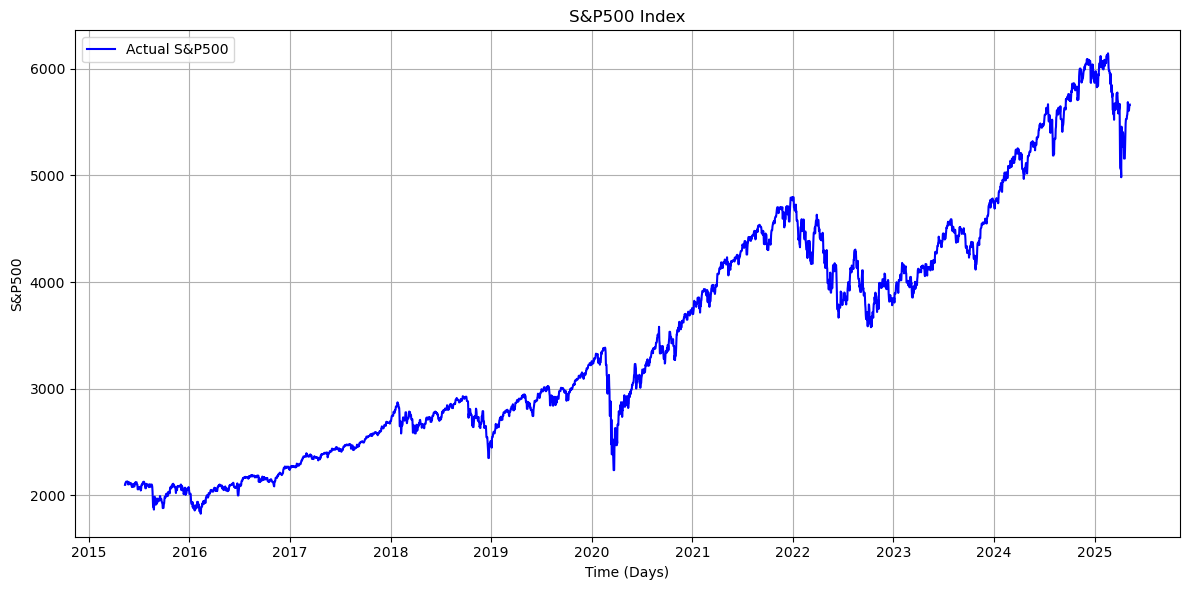

In [113]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(combined_df["SP500"], label='Actual S&P500', color='blue')
plt.title("S&P500 Index")
plt.xlabel("Time (Days)")
plt.ylabel("S&P500")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [115]:
# 7. Save to a single CSV
output_filename = "fred_combined_2022-2023.csv"
combined_df = combined_df.loc["2022-01-01":"2023-01-31"]

# Save to CSV
combined_df.to_csv(output_filename, index_label="DATE")

print(f"Filtered data saved to '{output_filename}'.")

Filtered data saved to 'fred_combined_2022-2023.csv'.


In [352]:
# ------------------------------------------------------------
# FNN MODEL
# ------------------------------------------------------------
# • Expects a cleaned CSV named `fred_combined_2022-2023.csv` with a DATE column
#   and a numeric target column (default: SP500).
# • Trains an MLP/FNN with time‑series CV, prints RMSEs, and visualises
#   (i) Train‑vs‑Val metrics per epoch and (ii) Predictions vs Actual on the
#   test partition of each fold.
# ------------------------------------------------------------

!pip install optuna

import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

pd.options.display.max_columns = None

# For performance metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [354]:
# --------------------------
# 1. HYPER-PARAMETERS 
# --------------------------

TARGET_COL = "SP500"         # change to your prediction target
TEST_SIZE = 0.10             # share of full sample set aside for test in each CV split
VAL_SIZE = 0.10              # share of training slice used for validation
N_SPLITS = 10                 # number of time‑series folds
BATCH_SIZE = 64
EPOCHS = 50
LR = 1e-3
HIDDEN_DIMS = [256, 128, 64]
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

In [356]:
# --------------------------
# 2. LOAD & SCALE DATA
# --------------------------

CSV_PATH = Path("fred_combined_2022-2023.csv")
if not CSV_PATH.exists():
    raise FileNotFoundError(f"{CSV_PATH} not found. Place it next to this script.")

raw = (
    pd.read_csv(CSV_PATH, parse_dates=["DATE"]).sort_values("DATE")
)

X = raw.drop(columns=["DATE", TARGET_COL]).values.astype(np.float32)
y = raw[TARGET_COL].values.astype(np.float32).reshape(-1, 1)

scaler_X, scaler_y = StandardScaler(), StandardScaler()

ts_cv = TimeSeriesSplit(n_splits=N_SPLITS, test_size=int(TEST_SIZE * len(raw)))

cv_rmse, cv_mae, cv_mape = [], [], []

def build_model(in_dim: int, hidden_dims):
    layers, dims = [], [in_dim] + hidden_dims + [1]
    for d_in, d_out in zip(dims[:-2], dims[1:-1]):
        layers += [nn.Linear(d_in, d_out), nn.ReLU(), nn.LayerNorm(d_out), nn.Dropout(0.1)]
    layers.append(nn.Linear(dims[-2], dims[-1]))
    return nn.Sequential(*layers)

In [358]:
# --------------------------
# 3. CROSS-VALIDATION LOOP
# --------------------------
for fold, (train_idx, test_idx) in enumerate(ts_cv.split(X)):
    tr_limit = int((1 - VAL_SIZE) * len(train_idx))
    tr_idx, val_idx = train_idx[:tr_limit], train_idx[tr_limit:]

    X_train = scaler_X.fit_transform(X[tr_idx])
    y_train = scaler_y.fit_transform(y[tr_idx])
    X_val   = scaler_X.transform(X[val_idx])
    y_val   = scaler_y.transform(y[val_idx])
    X_test  = scaler_X.transform(X[test_idx])
    y_test  = scaler_y.transform(y[test_idx])

    # training
    ds_tr = TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train))
    dl_tr = DataLoader(ds_tr, batch_size=BATCH_SIZE, shuffle=True)

    model = build_model(X.shape[1], HIDDEN_DIMS).to(DEVICE)
    opt = torch.optim.AdamW(model.parameters(), lr=LR)
    criterion = nn.MSELoss()

    train_mse_hist, val_rmse_hist = [], []

    for epoch in range(1, EPOCHS + 1):
        model.train(); epoch_loss = 0.0
        for xb, yb in dl_tr:
            xb, yb = xb.to(DEVICE), yb.to(DEVICE)
            opt.zero_grad(); preds = model(xb)
            loss = criterion(preds, yb); loss.backward(); opt.step()
            epoch_loss += loss.item() * xb.size(0)
        train_mse = epoch_loss / len(dl_tr.dataset)
        train_mse_hist.append(train_mse)

        model.eval()
        with torch.no_grad():
            val_preds = model(torch.from_numpy(X_val).to(DEVICE)).cpu().numpy()
        val_rmse = np.sqrt(mean_squared_error(y_val, val_preds))
        val_rmse_hist.append(val_rmse)

        if epoch % 10 == 0 or epoch == 1:
            print(f"Fold {fold+1}/{N_SPLITS} | Epoch {epoch:02d}/{EPOCHS} | Train MSE {train_mse:.6f} | Val RMSE {val_rmse:.6f}")

Fold 1/10 | Epoch 01/50 | Train MSE 0.225827 | Val RMSE 0.215181
Fold 1/10 | Epoch 10/50 | Train MSE 0.065843 | Val RMSE 0.191295
Fold 1/10 | Epoch 20/50 | Train MSE 0.015520 | Val RMSE 0.026139
Fold 1/10 | Epoch 30/50 | Train MSE 0.046886 | Val RMSE 0.025322
Fold 1/10 | Epoch 40/50 | Train MSE 0.012954 | Val RMSE 0.209241
Fold 1/10 | Epoch 50/50 | Train MSE 0.026724 | Val RMSE 0.034026
Fold 2/10 | Epoch 01/50 | Train MSE 0.956563 | Val RMSE 0.624075
Fold 2/10 | Epoch 10/50 | Train MSE 0.079644 | Val RMSE 0.436169
Fold 2/10 | Epoch 20/50 | Train MSE 0.053202 | Val RMSE 0.641270
Fold 2/10 | Epoch 30/50 | Train MSE 0.066632 | Val RMSE 0.582074
Fold 2/10 | Epoch 40/50 | Train MSE 0.038127 | Val RMSE 0.602500
Fold 2/10 | Epoch 50/50 | Train MSE 0.034983 | Val RMSE 0.494904
Fold 3/10 | Epoch 01/50 | Train MSE 2.077534 | Val RMSE 1.632862
Fold 3/10 | Epoch 10/50 | Train MSE 0.095220 | Val RMSE 1.180332
Fold 3/10 | Epoch 20/50 | Train MSE 0.088760 | Val RMSE 1.206504
Fold 3/10 | Epoch 30/50 |

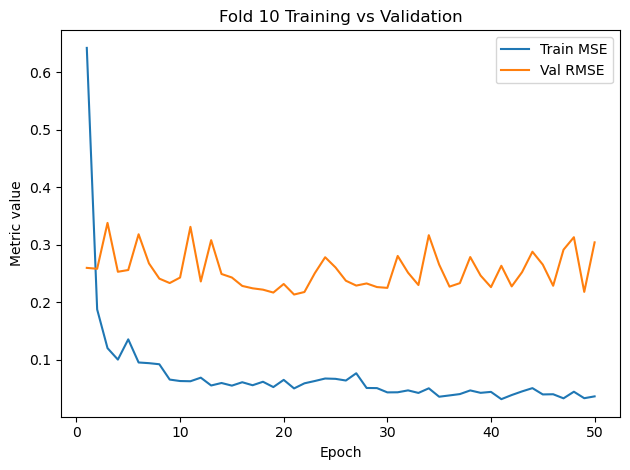

In [360]:
    # —— PLOT TRAINING CURVES ——
    plt.figure()
    plt.plot(range(1, EPOCHS + 1), train_mse_hist, label="Train MSE")
    plt.plot(range(1, EPOCHS + 1), val_rmse_hist, label="Val RMSE")
    plt.xlabel("Epoch"); plt.ylabel("Metric value")
    plt.title(f"Fold {fold+1} Training vs Validation")
    plt.legend(); plt.tight_layout(); plt.show()

Fold 10 Test RMSE: 0.324892



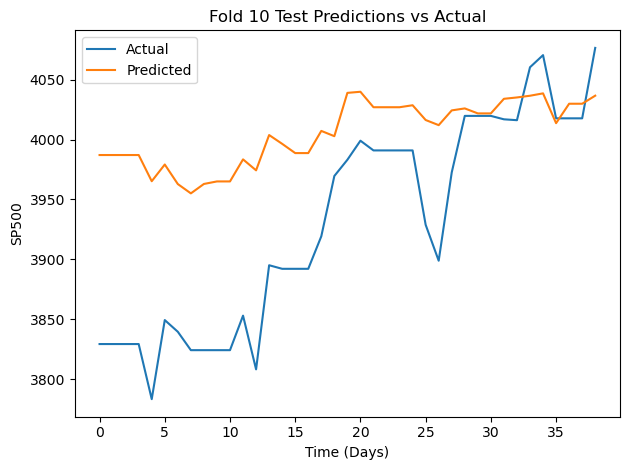

In [362]:
    # —— Evaluate on test ——
    with torch.no_grad():
        y_pred = model(torch.from_numpy(X_test).to(DEVICE)).cpu().numpy()
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
    cv_rmse.append(rmse_test)
    print(f"Fold {fold+1} Test RMSE: {rmse_test:.6f}\n")

    # —— Plot predictions vs actual ——
    y_test_inv = scaler_y.inverse_transform(y_test)
    y_pred_inv = scaler_y.inverse_transform(y_pred)
    plt.figure()
    plt.plot(y_test_inv.flatten(), label="Actual")
    plt.plot(y_pred_inv.flatten(), label="Predicted")
    plt.xlabel("Time (Days)"); plt.ylabel(TARGET_COL)
    plt.title(f"Fold {fold+1} Test Predictions vs Actual")
    plt.legend(); plt.tight_layout(); plt.show()

In [364]:
# --------------------------
# 4. SUMMARY STATISTICS
# --------------------------
print("Per‑fold Test RMSE:", [f"{m:.4f}" for m in cv_rmse])
print("Per‑fold Test MAE :", [f"{m:.4f}" for m in cv_mae])
print("Per‑fold Test MAPE:", [f"{m:.2f}%" for m in cv_mape])
print(f"Mean Test RMSE : {np.mean(cv_rmse):.4f}")
print(f"Mean Test MAE  : {np.mean(cv_mae):.4f}")
print(f"Mean Test MAPE : {np.mean(cv_mape):.2f}%")

Per‑fold Test RMSE: ['0.3249']
Per‑fold Test MAE : []
Per‑fold Test MAPE: []
Mean Test RMSE : 0.3249
Mean Test MAE  : nan
Mean Test MAPE : nan%


C:\Users\andy_\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\andy_\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [318]:
# --------------------------
# 5. HYPER-PARAMETER TUNING BAYESIAN OPTIMIZATION
# --------------------------
CSV_PATH = "fred_combined_2022-2023.csv"
TARGET_COL = "SP500"
VAL_SIZE = 0.10
TEST_SIZE = 0.10
N_SPLITS = 5
EPOCHS = 50
BATCH_SIZE = 64
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

In [320]:
# Load data
raw = pd.read_csv(CSV_PATH, parse_dates=["DATE"]).sort_values("DATE")
X = raw.drop(columns=["DATE", TARGET_COL]).values.astype(np.float32)
y = raw[TARGET_COL].values.astype(np.float32).reshape(-1, 1)
ts_cv = TimeSeriesSplit(n_splits=N_SPLITS, test_size=int(TEST_SIZE * len(raw)))

In [322]:
def build_model(in_dim, hidden_dims, dropout):
    dims = [in_dim] + hidden_dims + [1]
    layers = []
    for d_in, d_out in zip(dims[:-2], dims[1:-1]):
        layers += [
            nn.Linear(d_in, d_out),
            nn.ReLU(),
            nn.LayerNorm(d_out),  # ← use this instead of BatchNorm1d
            nn.Dropout(dropout)
        ]
    layers.append(nn.Linear(dims[-2], dims[-1]))
    return nn.Sequential(*layers)

In [326]:
# Objective function
def objective(trial):
    h1 = trial.suggest_int("h1", 64, 256)
    h2 = trial.suggest_int("h2", 32, 128)
    h3 = trial.suggest_int("h3", 16, 64)
    lr = trial.suggest_float("lr", 1e-4, 1e-2, log=True)
    dropout = trial.suggest_float("dropout", 0.0, 0.5)
    hidden_dims = [h1, h2, h3]

    scaler_X, scaler_y = StandardScaler(), StandardScaler()
    rmse_scores = []

    for fold, (train_idx, test_idx) in enumerate(ts_cv.split(X)):
        tr_limit = int((1 - VAL_SIZE) * len(train_idx))
        tr_idx, val_idx = train_idx[:tr_limit], train_idx[tr_limit:]

        X_train = scaler_X.fit_transform(X[tr_idx])
        y_train = scaler_y.fit_transform(y[tr_idx])
        X_val = scaler_X.transform(X[val_idx])
        y_val = scaler_y.transform(y[val_idx])

        ds_tr = TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train))
        dl_tr = DataLoader(ds_tr, batch_size=BATCH_SIZE, shuffle=True)

        model = build_model(X.shape[1], hidden_dims, dropout).to(DEVICE)
        opt = torch.optim.AdamW(model.parameters(), lr=lr)
        criterion = nn.MSELoss()

        for epoch in range(EPOCHS):
            model.train()
            for xb, yb in dl_tr:
                xb, yb = xb.to(DEVICE), yb.to(DEVICE)
                opt.zero_grad()
                preds = model(xb)
                loss = criterion(preds, yb)
                loss.backward()
                opt.step()

        model.eval()
        with torch.no_grad():
            val_preds = model(torch.from_numpy(X_val).to(DEVICE)).cpu().numpy()
        val_rmse = np.sqrt(mean_squared_error(y_val, val_preds))
        rmse_scores.append(val_rmse)

    return np.mean(rmse_scores)

In [328]:
# Run Optuna
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=20)
print("Best RMSE:", study.best_value)
print("Best Parameters:", study.best_params)

[I 2025-05-09 15:54:11,845] A new study created in memory with name: no-name-52212f24-0da0-49bc-888d-70a79a75e0c5
[I 2025-05-09 15:54:15,893] Trial 0 finished with value: 0.3510248363018036 and parameters: {'h1': 125, 'h2': 84, 'h3': 59, 'lr': 0.0015970099961069557, 'dropout': 0.2430218140944888}. Best is trial 0 with value: 0.3510248363018036.
[I 2025-05-09 15:54:20,223] Trial 1 finished with value: 0.4102749824523926 and parameters: {'h1': 214, 'h2': 47, 'h3': 44, 'lr': 0.0020375214806309648, 'dropout': 0.4380094296983946}. Best is trial 0 with value: 0.3510248363018036.
[I 2025-05-09 15:54:23,994] Trial 2 finished with value: 0.35520797967910767 and parameters: {'h1': 83, 'h2': 91, 'h3': 38, 'lr': 0.007448412379462484, 'dropout': 0.15737081221476318}. Best is trial 0 with value: 0.3510248363018036.
[I 2025-05-09 15:54:27,620] Trial 3 finished with value: 0.4355497360229492 and parameters: {'h1': 112, 'h2': 46, 'h3': 45, 'lr': 0.000254529636154211, 'dropout': 0.21705798946329757}. Be

Best RMSE: 0.29745203256607056
Best Parameters: {'h1': 206, 'h2': 126, 'h3': 52, 'lr': 0.005732306892937429, 'dropout': 0.06939903355933769}


In [336]:
# --------------------------
# 6. OPTIMIZED FNN
# --------------------------
TARGET_COL = "SP500"
TEST_SIZE = 0.10             
VAL_SIZE = 0.10              
N_SPLITS = 10
BATCH_SIZE = 64
EPOCHS = 50
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# Optimized Parameters
best_params = {
    'h1': 206,
    'h2': 126,
    'h3': 52,
    'lr': 0.005732306892937429,
    'dropout': 0.06939903355933769
}

In [338]:
HIDDEN_DIMS = [best_params['h1'], best_params['h2'], best_params['h3']]
LR = best_params['lr']

CSV_PATH = Path("fred_combined_2022-2023.csv")
raw = pd.read_csv(CSV_PATH, parse_dates=["DATE"]).sort_values("DATE")

X = raw.drop(columns=["DATE", TARGET_COL]).values.astype(np.float32)
y = raw[TARGET_COL].values.astype(np.float32).reshape(-1, 1)

scaler_X, scaler_y = StandardScaler(), StandardScaler()
ts_cv = TimeSeriesSplit(n_splits=N_SPLITS, test_size=int(TEST_SIZE * len(raw)))

cv_rmse, cv_mae, cv_mape = [], [], []

In [340]:
def build_model(in_dim: int, hidden_dims):
    layers, dims = [], [in_dim] + hidden_dims + [1]
    for d_in, d_out in zip(dims[:-2], dims[1:-1]):
        layers += [
            nn.Linear(d_in, d_out),
            nn.ReLU(),
            nn.LayerNorm(d_out),
            nn.Dropout(best_params['dropout'])
        ]
    layers.append(nn.Linear(dims[-2], dims[-1]))
    return nn.Sequential(*layers)

# --------------------------
# 3. Cross-Validation Loop
# --------------------------
for fold, (train_idx, test_idx) in enumerate(ts_cv.split(X)):
    tr_limit = int((1 - VAL_SIZE) * len(train_idx))
    tr_idx, val_idx = train_idx[:tr_limit], train_idx[tr_limit:]

    X_train = scaler_X.fit_transform(X[tr_idx])
    y_train = scaler_y.fit_transform(y[tr_idx])
    X_val   = scaler_X.transform(X[val_idx])
    y_val   = scaler_y.transform(y[val_idx])
    X_test  = scaler_X.transform(X[test_idx])
    y_test  = scaler_y.transform(y[test_idx])

    ds_tr = torch.utils.data.TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train))
    dl_tr = torch.utils.data.DataLoader(ds_tr, batch_size=BATCH_SIZE, shuffle=True)

    model = build_model(X.shape[1], HIDDEN_DIMS).to(DEVICE)
    opt = torch.optim.AdamW(model.parameters(), lr=LR)
    criterion = nn.MSELoss()

    train_mse_hist, val_rmse_hist = [], []

    for epoch in range(1, EPOCHS + 1):
        model.train(); epoch_loss = 0.0
        for xb, yb in dl_tr:
            xb, yb = xb.to(DEVICE), yb.to(DEVICE)
            opt.zero_grad(); preds = model(xb)
            loss = criterion(preds, yb); loss.backward(); opt.step()
            epoch_loss += loss.item() * xb.size(0)
        train_mse = epoch_loss / len(dl_tr.dataset)
        train_mse_hist.append(train_mse)

        model.eval()
        with torch.no_grad():
            val_preds = model(torch.from_numpy(X_val).to(DEVICE)).cpu().numpy()
        val_rmse = np.sqrt(mean_squared_error(y_val, val_preds))
        val_rmse_hist.append(val_rmse)

        if epoch % 10 == 0 or epoch == 1:
            print(f"Fold {fold+1}/{N_SPLITS} | Epoch {epoch:02d}/{EPOCHS} | Train MSE {train_mse:.6f} | Val RMSE {val_rmse:.6f}")

Fold 1/10 | Epoch 01/50 | Train MSE 3.347675 | Val RMSE 0.305618
Fold 1/10 | Epoch 10/50 | Train MSE 0.049264 | Val RMSE 0.142593
Fold 1/10 | Epoch 20/50 | Train MSE 0.013076 | Val RMSE 0.144786
Fold 1/10 | Epoch 30/50 | Train MSE 0.013508 | Val RMSE 0.074164
Fold 1/10 | Epoch 40/50 | Train MSE 0.008553 | Val RMSE 0.117073
Fold 1/10 | Epoch 50/50 | Train MSE 0.046989 | Val RMSE 0.150752
Fold 2/10 | Epoch 01/50 | Train MSE 1.307033 | Val RMSE 1.704037
Fold 2/10 | Epoch 10/50 | Train MSE 0.094050 | Val RMSE 0.682781
Fold 2/10 | Epoch 20/50 | Train MSE 0.047951 | Val RMSE 0.674590
Fold 2/10 | Epoch 30/50 | Train MSE 0.036371 | Val RMSE 0.686740
Fold 2/10 | Epoch 40/50 | Train MSE 0.051062 | Val RMSE 0.653951
Fold 2/10 | Epoch 50/50 | Train MSE 0.032254 | Val RMSE 0.617768
Fold 3/10 | Epoch 01/50 | Train MSE 1.020947 | Val RMSE 1.729848
Fold 3/10 | Epoch 10/50 | Train MSE 0.111016 | Val RMSE 1.188163
Fold 3/10 | Epoch 20/50 | Train MSE 0.058353 | Val RMSE 1.278487
Fold 3/10 | Epoch 30/50 |

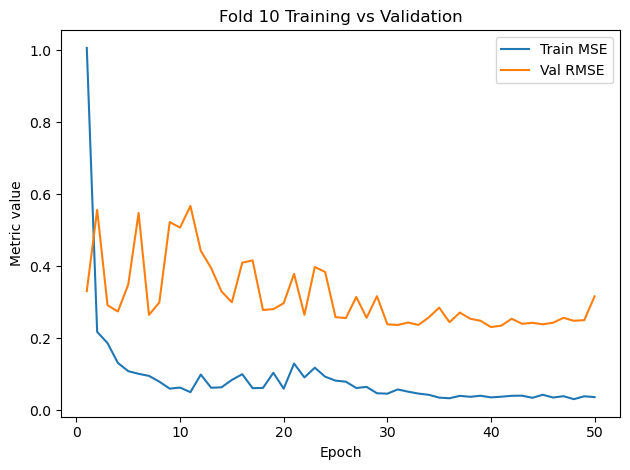

In [342]:
# Plot training curve
plt.figure()
plt.plot(range(1, EPOCHS + 1), train_mse_hist, label="Train MSE")
plt.plot(range(1, EPOCHS + 1), val_rmse_hist, label="Val RMSE")
plt.xlabel("Epoch"); plt.ylabel("Metric value")
plt.title(f"Fold {fold+1} Training vs Validation")
plt.legend(); plt.tight_layout(); plt.show()

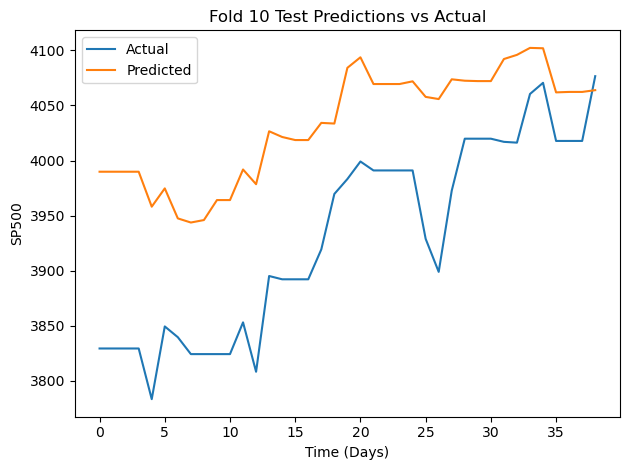

In [344]:
# Test evaluation
model.eval()
with torch.no_grad():
    y_pred = model(torch.from_numpy(X_test).to(DEVICE)).cpu().numpy()

    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
    mae_test = mean_absolute_error(y_test, y_pred)
    mape_test = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    cv_rmse.append(rmse_test)
    cv_mae.append(mae_test)
    cv_mape.append(mape_test)

    y_test_inv = scaler_y.inverse_transform(y_test)
    y_pred_inv = scaler_y.inverse_transform(y_pred)

    plt.figure()
    plt.plot(y_test_inv.flatten(), label="Actual")
    plt.plot(y_pred_inv.flatten(), label="Predicted")
    plt.xlabel("Time (Days)")
    plt.ylabel(TARGET_COL)
    plt.title(f"Fold {fold+1} Test Predictions vs Actual")
    plt.legend(); plt.tight_layout(); plt.show()

In [348]:
# --------------------------
# 4. Final Summary
# --------------------------
print("------------- Summary -------------")
print("Per‑fold Test RMSE:", [f"{m:.4f}" for m in cv_rmse])
print("Per‑fold Test MAE :", [f"{m:.4f}" for m in cv_mae])
print("Per‑fold Test MAPE:", [f"{m:.2f}%" for m in cv_mape])
print(f"Mean Test RMSE : {np.mean(cv_rmse):.4f}")
print(f"Mean Test MAE  : {np.mean(cv_mae):.4f}")
print(f"Mean Test MAPE : {np.mean(cv_mape):.2f}%")

------------- Summary -------------
Per‑fold Test RMSE: ['0.3705']
Per‑fold Test MAE : ['0.3408']
Per‑fold Test MAPE: ['55.42%']
Mean Test RMSE : 0.3705
Mean Test MAE  : 0.3408
Mean Test MAPE : 55.42%
